# Heart Disease Prediction Model

## Phase 1: Exploratory Data Analysis


### 1. Loading and Understanding the data

In [8]:
import pandas as pd
df = pd.read_csv("../data/heart.csv")

print("Dataset Head: ")
df.head()

Dataset Head: 


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
print("Dataset Info: ")
df.info()

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
print("Dataset Description: ")
df.describe()

Dataset Description: 


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 2. Check for nulls, balance and visualize

<Axes: >

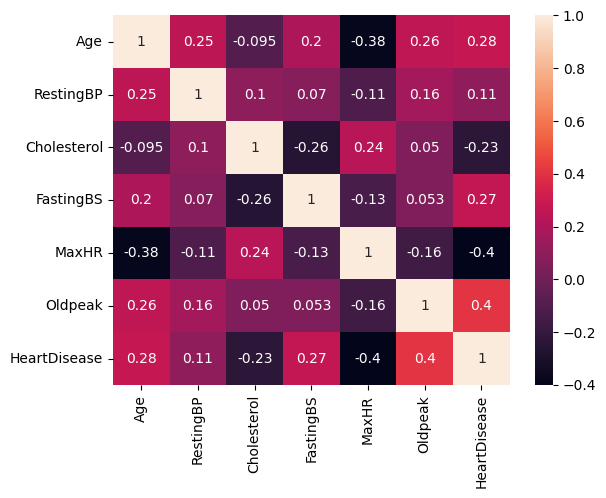

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="HeartDisease", data=df)
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True)

### 3. Encode Categorical Columns

In [12]:
X = pd.get_dummies(df.drop("HeartDisease", axis=1), drop_first=True)
feature_columns = X.columns.tolist()
import pickle

with open("../models/columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)


### 4. Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.drop("HeartDisease", axis=1))
y = df["HeartDisease"]

ValueError: could not convert string to float: 'M'

## Phase 2: Model Building

### 1. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Train Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

### 3. Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       112
           1       0.90      0.88      0.89       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276


Accuracy Score:  0.8695652173913043


## Phase 3: Explainability with SHAP

d:\Coding\AIML\Machine Learnining\Projects\heart-disease-prediction\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Figure size 640x480 with 0 Axes>

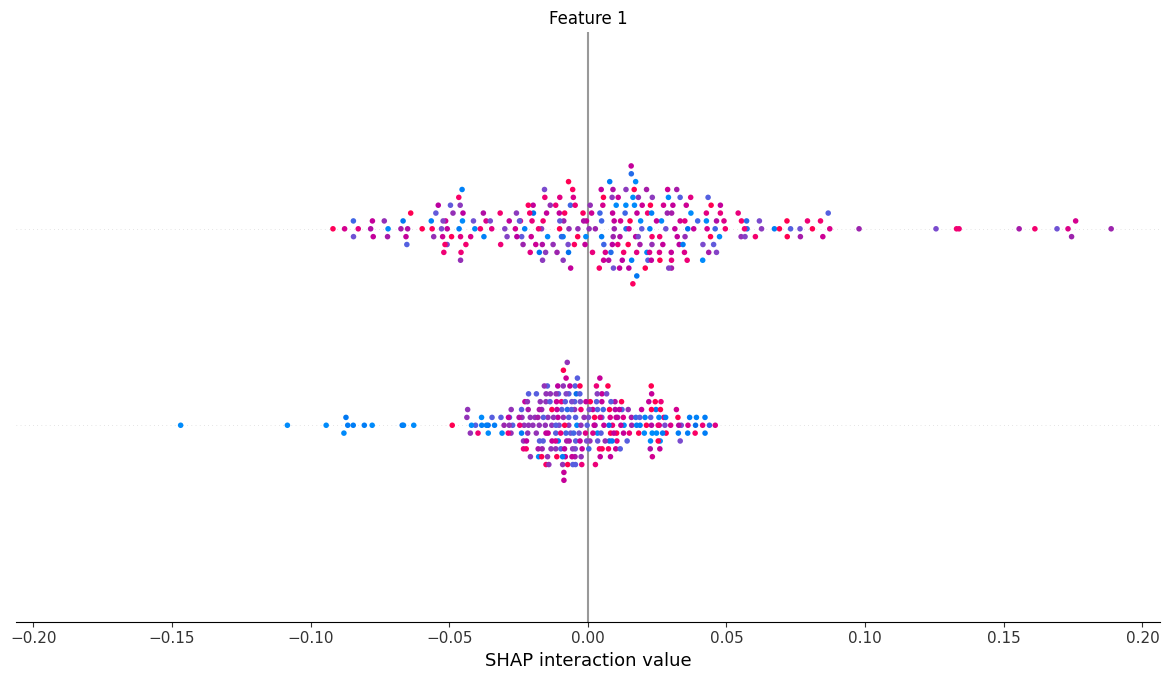

<Figure size 640x480 with 0 Axes>

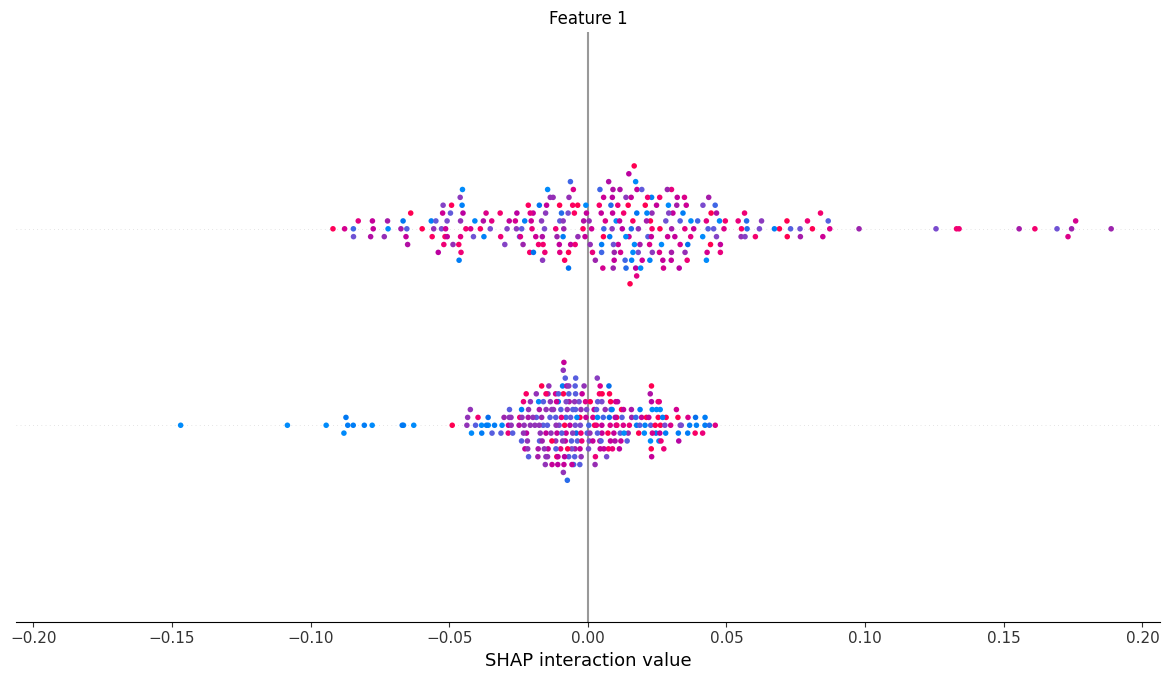

In [ ]:
import shap
import matplotlib
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, features=X_test)



## Phase 4: Saving the trained model

In [ ]:
import pickle
with open ("../models/model.pkl", "wb") as f:
    pickle.dump(model, f)

with open ("../models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)